In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True
IPythonConsole.molSize = 350,350
from rdkit.Chem import rdFMCS

# Melatonin

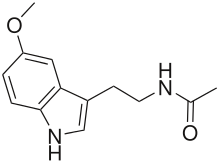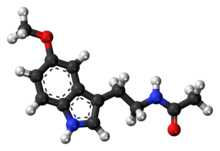

IUPAC name
- N-[2-(5-methoxy-1H-indol-3-yl)ethyl]acetamide

In humans, melatonin is a full agonist of melatonin receptor 1 (picomolar binding affinity) and melatonin receptor 2 (nanomolar binding affinity), both of which belong to the class of G-protein coupled receptors (GPCRs). Melatonin receptors 1 and 2 are both Gi/o-coupled GPCRs, although melatonin receptor 1 is also Gq-coupled. Melatonin also acts as a high-capacity free radical scavenger within mitochondria which also promotes the expression of antioxidant enzymes such as superoxide dismutase, glutathione peroxidase, glutathione reductase, and catalase via signal transduction through melatonin receptors.

# Ramelteon

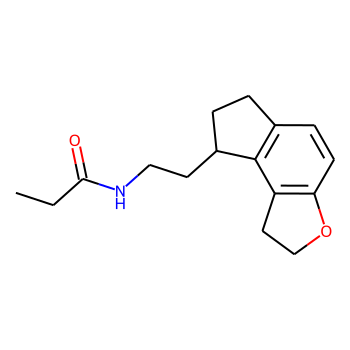

In [2]:
Ramelteon = Chem.MolFromSmiles("CCC(=O)NCCC1CCC2=C1C3=C(C=C2)OCC3")
Ramelteon

IUPAC name
- N-[2-[(8S)-2,6,7,8-tetrahydro-1H-cyclopenta[e][1]benzofuran-8-yl]ethyl]propanamide

Melatonin receptor agonist
GABAA 수용체가 아닌, suprachiasmatic nucleus(SCN)에서 MT1 and MT2 수용체에 결합하여 수면작용을 나타내는 약물
중독증상이나 인지능 및 장애 등의 부작용을 보이지 않는 것으로 나타남

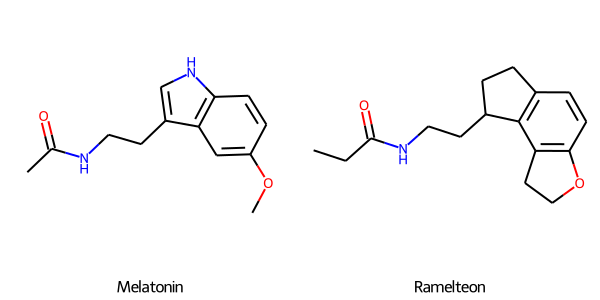

In [3]:
Melatonin=Chem.MolFromSmiles("CC(=O)NCCC1=CNC2=C1C=C(C=C2)OC")

mols = [Melatonin, Ramelteon ]
mols_str= ["Melatonin", "Ramelteon"]
rdkit.Chem.Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(300, 300), legends=mols_str)

- melatonin의 indole 골격은 활성에 반드시 필요하지 않고, 방향족 등배체로 대체될 수 있음,
ramelteon의 경우 indane으로 대체됨, amide 곁 사슬과 5-methoxy 치환기 사이의 최적의 거리를 위해 방향족 고리가 중요함.
- 방향족 고리는 수용체 결합부위의 방향족 잔기와 π-π stack을 통해 상호작용함, amide group은 MT수용체 활성에 중요하고
MT1 수용체 trans-membrane helix(TMH)3의 Ser110및 Ser114와 MT2의 TMH4의 Asn175과 결합함.
- methoxy group은 기능적효과에 중요하고 산소는 MT1R의 TMH6에 존재하는 His195및 MT2R의 TMH6에 존재하는 His208과 결합함,
- methoxy group의 4-,6-,7-위치로 이동은 활성을 감소시킴
- methoxy group의 메틸기는 Val192와 결합함.
- 멜라토닌 수용체들은 입체 선택성이 매우 큼, 라멜테온의 경우 (S)-form이 (R)-form보다 MT1에 대해 500배 강한 결합력을 나타냄.

In [4]:
res=rdFMCS.FindMCS(mols)
res

In [5]:
res.smartsString

'[#6]-[#6](=[#8])-[#7]-[#6]-[#6]-[#6](:,-[#6]):,-[#6]1:[#6]:[#6]:[#6]:[#6](:[#6]:1)-[#8]-[#6]'

In [6]:
Melatonin.GetSubstructMatches(Chem.MolFromSmarts('[#6]-[#6](=[#8])-[#7]-[#6]-[#6]-[#6](:,-[#6]):,-[#6]1:[#6]:[#6]:[#6]:[#6](:[#6]:1)-[#8]-[#6]'))

((0, 1, 2, 3, 4, 5, 6, 7, 10, 9, 14, 13, 12, 11, 15, 16),)

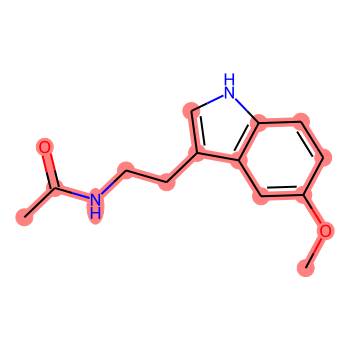

In [7]:
Melatonin

In [8]:
Ramelteon.GetSubstructMatches(Chem.MolFromSmarts('[#6]-[#6](=[#8])-[#7]-[#6]-[#6]-[#6](:,-[#6]):,-[#6]1:[#6]:[#6]:[#6]:[#6](:[#6]:1)-[#8]-[#6]'))

((1, 2, 3, 4, 5, 6, 7, 8, 11, 10, 15, 14, 13, 12, 16, 17),)

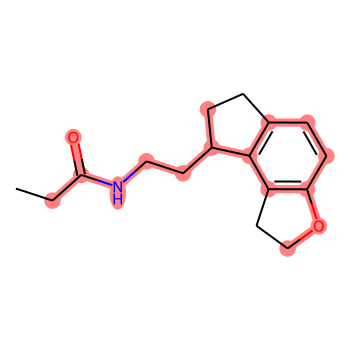

In [9]:
Ramelteon

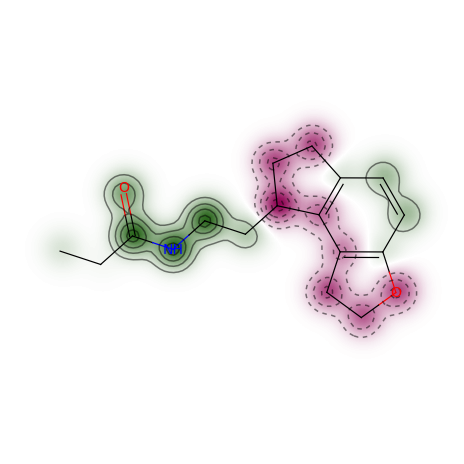

In [10]:
from rdkit.Chem.Draw import SimilarityMaps
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(Melatonin, Ramelteon, SimilarityMaps.GetMorganFingerprint)

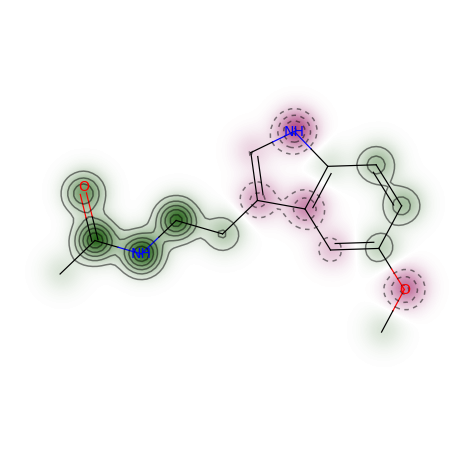

In [11]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(Ramelteon, Melatonin, SimilarityMaps.GetMorganFingerprint)

In [12]:
from rdkit.Chem.Crippen import MolLogP
for m in mols:
    logp = MolLogP(m)
    print(logp)
    m.SetProp("LogP", f"logP: {logp:.3f}") # property 설정할 때는 string으로 넣어주어야 

1.8551
2.5676000000000005


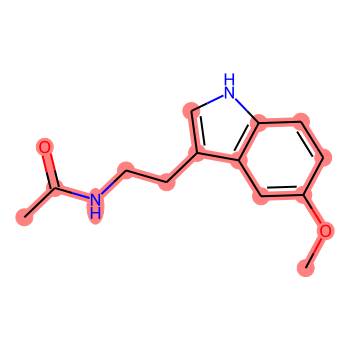

In [13]:
Melatonin

- Melatonin LogP : 1.6 (Source: DrugBank)

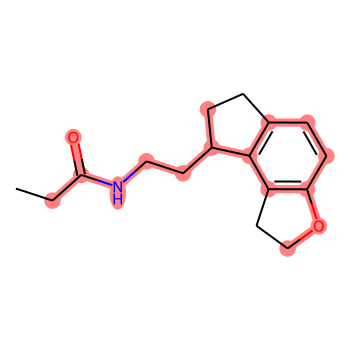

In [14]:
Ramelteon

- Ramelteon LogP : 2.4 (Source: DrugBank, HMDB)
- 반감기 : 1-2.6시간, 단백질결합율 82%, 생체이용률은 1.8%

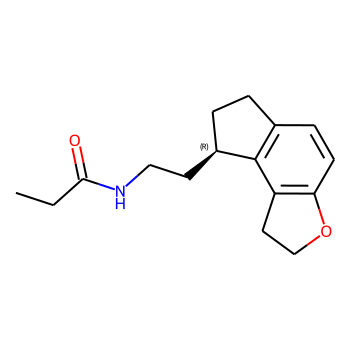

In [15]:
Ramelteon_R = Chem.MolFromSmiles("CCC(=O)NCC[C@H]1CCC2=C1C3=C(C=C2)OCC3")
Ramelteon_R

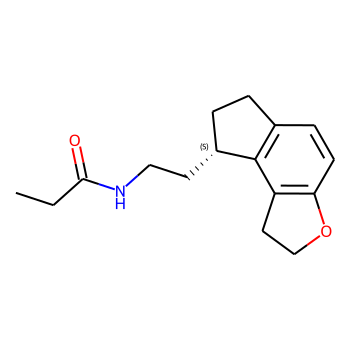

In [16]:
Ramelteon_S = Chem.MolFromSmiles("CCC(=O)NCC[C@@H]1CCC2=C1C3=C(C=C2)OCC3")
Ramelteon_S

- 멜라토닌 수용체들은 입체 선택성이 매우 큼, 라멜테온의 경우 (S)-form이 (R)-form보다 MT1에 대해 500배 강한 결합력을 나타냄.